In [38]:
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import astropy
from astropy.table import Table
from os import listdir
from os.path import isfile, join
import math
import scipy
from scipy import stats

In [3]:
predfiles = [f for f in listdir('MPhys/catalogues/base_filter_permutations/PRED') if isfile(join('MPhys/catalogues/base_filter_permutations/PRED', f))]
trainfiles = [f for f in listdir('MPhys/catalogues/base_filter_permutations/TRAIN') if isfile(join('MPhys/catalogues/base_filter_permutations/TRAIN', f))]

In [177]:
predfiles.sort()
trainfiles.sort()
for i in range(7):
    print(predfiles[i])

PRED_filter_choice_f115w_to_f125w.cat
PRED_filter_choice_f115w_to_f140w.cat
PRED_filter_choice_f115w_to_f150w.cat
PRED_filter_choice_f115w_to_f160w.cat
PRED_filter_choice_f115w_to_f435w.cat
PRED_filter_choice_f115w_to_f606w.cat
PRED_filter_choice_f115w_to_f814w.cat


In [34]:
for i in trainfiles:
    x = [i.split('_')[5]for i in trainfiles]
for j in x:
    filt = [j.split('.')[0]for j in x]

change_filt = 'f115w'

# Redshift Plotting 


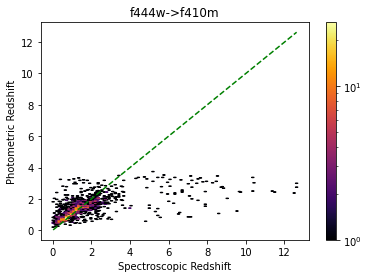

In [32]:

for i in range(8,9):

    zspec_lst =[]
    zphot = []
    error=[]
    file_zspec = open(f'MPhys/catalogues/base_filter_permutations/PRED/{predfiles[i]}','r')
    #file_zspec['VALUE']
    for _ in range(1):
        next(file_zspec)
    for line in file_zspec:
        #print(len(line))
        splitter = re.sub("\s+",",",line.strip())
        tokens = splitter.split(',')

        zspec_lst.append(float(tokens[4]))
    file_zspec.close()

    file = open(f'MPhys/gpz_files/gpz_jwst_{change_filt}-{filt[i]}.cat','r')
    for _ in range(11):
        next(file)
    for line in file:
        splitter_numbf = re.sub("\s+",",",line.strip())
        tokens_numbf = splitter_numbf.split(',')
        zphot.append(float(tokens_numbf[1]))
        error.append(float(tokens_numbf[0]))
    file.close()
    x = np.linspace(np.min(zspec_lst),np.max(zspec_lst))

    plt.plot(x,x,color = 'g',linestyle = '--')
    plt.hexbin(zspec_lst, zphot,cmap = 'inferno',bins='log',mincnt=1)
    plt.xlabel('Spectroscopic Redshift')
    plt.ylabel('Photometric Redshift')
    #plt.xlim(0,8)
    #plt.ylim(0,8)
    plt.title(f'{change_filt}->{filt[i]}')

    plt.colorbar()
    plt.savefig(f'MPhys/gpz_files/{change_filt}_to_{filt[i]}_hexplot.png')
    plt.show()
    plt.close()


# Statistics 


In [182]:
zspec_stat =[]
zphot_stat = []
error_stat=[]
for w in range(1,2):
    file= open(f'MPhys/catalogues/base_filter_permutations/PRED/{predfiles[w]}','r')
    #file_zspec['VALUE']
    for _ in range(1):
        next(file)
    for line in file:
        #print(len(line))
        splitter = re.sub("\s+",",",line.strip())
        tokens = splitter.split(',')

        zspec_stat.append(float(tokens[4]))
    file.close()

    file = open(f'MPhys/gpz_files/gpz_jwst_{change_filt}-{filt[w]}.cat','r')
    for _ in range(11):
        next(file)
    for line in file:
        splitter_numbf = re.sub("\s+",",",line.strip())
        tokens_numbf = splitter_numbf.split(',')
        zphot_stat.append(float(tokens_numbf[1]))
        error_stat.append(float(tokens_numbf[2]))
    file.close()

    
    
    delta_z = []
    outliers = []

    logz = []
    for i in range(len(zphot)):
        delta_z.append(abs(float(zphot_stat[i])-float(zspec_stat[i])))
        outliers.append(float(delta_z[i])/(1+float(zspec_stat[i])))
        logz.append(np.log10(1+zspec_stat[i]))
    x=[]

    p=0
    l= np.arange(0,1.2,0.1)
    file= open(f'MPhys/redshift_binned_olf_{filt[w]}.txt','w+')
    while p<len(l):
        m=0
        k=0
        c=0
        for j in range(len(logz)):
            if l[p]<=logz[j]<=l[p]+0.1:
                c+=1

        for j in range(len(logz)):
            if l[p]<=logz[j]<=l[p]+0.1:

                if abs(outliers[j])>0.15:
                    m+=1
                #if abs(outliers[j])>(3*np.log10(error_stat[j])):
                   # k+=1
                x.append(delta_z[j]/(1+float(zspec_stat[j])))

        sig_nmad = scipy.stats.median_abs_deviation(x)
        outlier_frac = m/c
        #print(p,outlier_frac,sig_nmad)
        #outlier_frac_sig =k/c
        file.write(str(l[p])+','+str(outlier_frac)+','+str( sig_nmad)+'\n')
        p+=1
    file.close()


1


IndexError: list index out of range

1


0 0.95 0.10051281818875693
1 0.7164750957854407 0.07221524742083507
2 0.1940928270042194 0.0782057666789781
3 0.18703703703703703 0.0562685538393714
4 0.16445623342175067 0.0519448048671482
5 0.5611111111111111 0.05789444322396137
6 0.7058823529411765 0.059545780543451284
7 1.0 0.06023414296932038
8 1.0 0.061214064146657275
9 1.0 0.0626628124836803
10 1.0 0.06341340392778881
11 1.0 0.06349027557982778


In [168]:
x1=[]
m=0
k=0
c=0
for j in range(len(logz)):
    if l[7]<=logz[j]<=l[7]+0.1:
        c+=1
print(c)
for j in range(len(logz)):
    if l[7]<=logz[j]<=l[7]+0.1:

        if abs(outliers[j])>0.15:
            m+=1
        #if abs(outliers[j])>(3*np.log10(error_stat[j])):
           # k+=1
        x1.append(delta_z[j]/(1+float(zspec_stat[j])))

sig_nmad = scipy.stats.median_abs_deviation(x1)
outlier_frac = m/c
print(l[7],outlier_frac,sig_nmad)

10
0.7000000000000001 1.0 0.11635192650064519


In [137]:
sigs=[]
olfs=[]

file = open('MPhys/redshift_binned_olf.txt','r')
for line in file:

    splitter = re.sub("\s+",",",line.strip())
    tokens = splitter.split(',')
    
    sigs.append(float(tokens[1]))
    olfs.append(float(tokens[2]))

Text(0.5, 1.0, 'f125w replacing f115w')

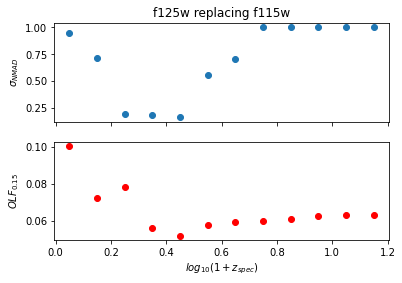

In [162]:
x_vals = l+0.05
fig,ax = plt.subplots(2,1,sharex=True)
ax[0].scatter(x_vals,sigs,marker = 'o')
ax[1].scatter(x_vals, olfs,marker = 'o',color= 'r')
ax[0].set_ylabel('$\sigma_{NMAD}$')
ax[1].set_ylabel('$OLF_{0.15}$')
ax[1].set_xlabel('$log_{10}(1+z_{spec})$')
ax[0].set_title(f'{filt[0]} replacing {change_filt}')

# Comparison of Different Parameters


In [52]:
##difference between diagonal and full covarience
zphot_full = []
error_full=[]

file = open(f'MPhys/parameter_files/gpz_GPGC.cat','r')
for _ in range(11):
    next(file)
for line in file:

    splitter_numbf = re.sub("\s+",",",line.strip())
    tokens_numbf = splitter_numbf.split(',')
    
    zphot_full.append(float(tokens_numbf[0]))
    error_full.append(float(tokens_numbf[1])/float(1+float(tokens[10])))

file.close()

In [53]:
##difference between diagonal and full covarience
zphot_diag = []
error_diag=[]

file = open(f'MPhys/parameter_files/gpz_nbf150.cat','r')
for _ in range(11):
    next(file)
for line in file:

    splitter_numbf = re.sub("\s+",",",line.strip())
    tokens_numbf = splitter_numbf.split(',')
    
    zphot_diag.append(float(tokens_numbf[0]))
    
    error_diag.append(float(tokens_numbf[1])/float(1+float(tokens[10])))

file.close()


In [54]:
highdiff=[]
diff=[]
tst=[]
a=[]
for i in range(len(zphot_diag)):
    diff.append(abs(zphot_diag[i]-zphot_full[i]))
    #print((zphot_full[i]/100)*2)
for j in range(len(diff)):
    #tst.append((zphot_diag[j]*0.02))
    if diff[j]>=((1+zphot_diag[j])*0.2):
        if diff[j]>0:
            highdiff.append(j)


In [55]:
new_gpvd=[]
new_gpvd_err=[]
new_gpvc=[]
new_gpvc_err=[]
new_zspec=[]
for k in highdiff:
    if k>0:
        new_gpvd.append(zphot_diag[k])
        new_gpvd_err.append(error_diag[k])
        
        new_gpvc.append(zphot_full[k])
        new_gpvc_err.append(error_full[k])
        new_zspec.append(zspec[k])
        
        
new_data_diag = np.array((new_gpvd,new_zspec,new_gpvd_err ))
new_data_full = np.array((new_gpvc,new_zspec,new_gpvc_err ))


2869


In [47]:
print(new_gpvd[0],new_zspec[0])
fig,ax= plt.subplots(1,3,sharex=True,sharey=True,figsize=(10, 4))
ax[0].hexbin(new_data_full[0] , new_data_diag[1],cmap = 'autumn',bins='log')
ax[1].hexbin(new_data_diag[0] , new_data_diag[1],cmap='winter',bins='log')
ax[2].hexbin(new_data_diag[0] , new_data_diag[1],cmap='winter',bins='log')
ax[2].hexbin(new_data_full[0] , new_data_diag[1],cmap = 'autumn',bins='log')
#plt.hexbin(new_data_full[0] , new_data_diag[1],bins='log')
ax[0].set_title('Full \n Covariance')
ax[1].set_title('Diagonal \n Covariance')
ax[2].set_title('Full and Diagonal \n Covariance')


fig.tight_layout(pad=0.4, w_pad=2, h_pad=1.0)
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('MPhys/diag_full_cov_difference_10pc.png')
plt.close()

0.1556116 0.12077


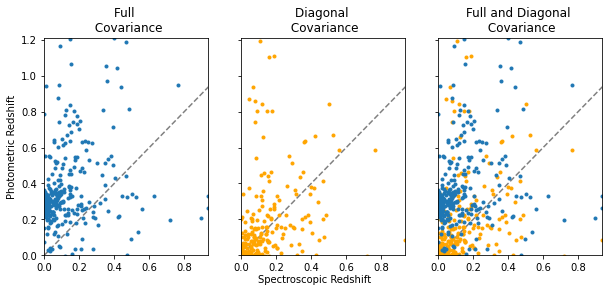

In [63]:
x=np.linspace(0,np.max(new_data_full[0]),20)

fig,ax= plt.subplots(1,3,sharex=True,sharey=True,figsize=(10, 4))
fig.text(0.5, 0.04, 'Spectroscopic Redshift', ha='center', va='center')
#a.set_xlabel('Spectroscopic Redshift')
ax[0].set_ylabel('Photometric Redshift')
ax[0].errorbar(new_data_full[1] , new_data_full[0],fmt='.')#,cmap = 'autumn',bins='log')
ax[1].errorbar(new_data_diag[1] , new_data_diag[0],color = 'orange',fmt='.')#,cmap='winter',bins='log')
ax[2].errorbar(new_data_diag[1] , new_data_diag[0],color = 'orange',fmt='.')#,cmap='winter',bins='log')
ax[2].errorbar(new_data_full[1] , new_data_full[0],fmt='.')#,cmap = 'autumn',bins='log')
#plt.hexbin(new_data_full[0] , new_data_diag[1],bins='log')
ax[0].plot(x,x,linestyle = '--', color = 'grey')
ax[1].plot(x,x,linestyle = '--', color = 'grey')
ax[2].plot(x,x,linestyle = '--', color = 'grey')
ax[0].set_title('Full \n Covariance')
ax[1].set_title('Diagonal \n Covariance')
ax[2].set_title('Full and Diagonal \n Covariance')

plt.xlim(0,np.max(new_data_full[1]))
plt.ylim(0,np.max(new_data_full[0]))
plt.savefig('MPhys/parameter_plots/full_vs_diag.png')

(0.0, 1.2)

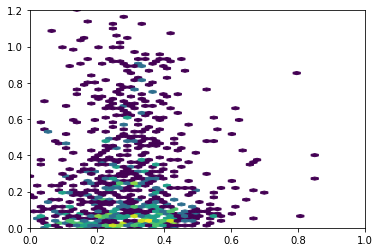

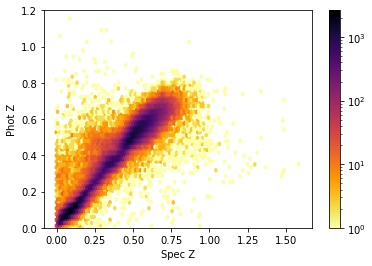